# Business Data Analytics and Prediction
*Dr. Gilli Shama*

## Lesson 1.3 EDA in Python

In previous lesson we have taken a quick glance on the data summary. In this exercise you will start analyzing the data visually. Before starting the analysis you need to set a side data for testing.

This exercise is written in Jupyter notebook.

### Create a Test Set
After a quick glance, split your data to train and test sets, and then put the test set aside and dont look on it until you have models to compare.

#### 1) Read the data

The business analytics concepts and code will be demonstrated on HR data of employees attrition, evaluation and satisfaction: https://www.kaggle.com/ludobenistant/hr-analytics

Download the csv file from the link above, to your local folder, save it as Excel, and then read it to a data frame, as below.

In [3]:
import pandas as pd #pandas enables to handle data frames. To run any command from pandas type "pd." and command name

In [4]:
df = pd.read_excel("C:/Users/gillis/Documents/_Personal/IDC/Business_Data_Analytics/human-resources-analytics/HR_comma_sep.xlsx")  #Note to change the file to your donloaded location and name

After reading the file you can view it by running the data name: df.

#### 2) Split the data to train and test

1. Below is a code that scrumbles the data and then select 75% of the data as train and 25% as test. Run similar code, spliting the data to 80% train and 20% test
2. What is the parameter random_state? What will happen if you’ll change its number?
3. Think and only then view: what is the number of rows in df.train and df.test? (use len function)
4. How can you check if the average attrition is sustained on the test set as in the original data?

In [14]:
from sklearn.model_selection import train_test_split 
#sklearn (SciKit Learn) is the machine learning library, see more in: http://scikit-learn.org/stable/index.html 
#When you import a specific function from a package you can now run it without the package name

In [15]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=101)

### Explore each predictor
#### 3) Draw the histogram

As a first step visualize each variable separately. Possible visualizations are: histogram, density and boxplot. Where the first one is the most common and recommended. Use histogram to understand the values distribution, noting that many statistical model assume normal distribution.
Start with simple out of the box histogram: 

In [19]:
%matplotlib inline #The inline is a Jupyter command to display the graphics inline
import matplotlib.pyplot as plt #Matplot is the most popular python library for plots.

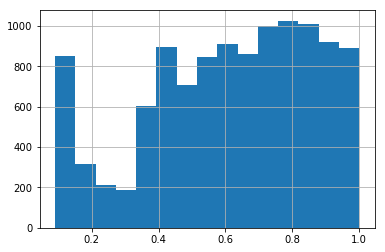

In [21]:
df_train.satisfaction_level.hist(bins = 15) 

Create a nicer histogram. Change the color of the histogram, the labels and the number of breaks.

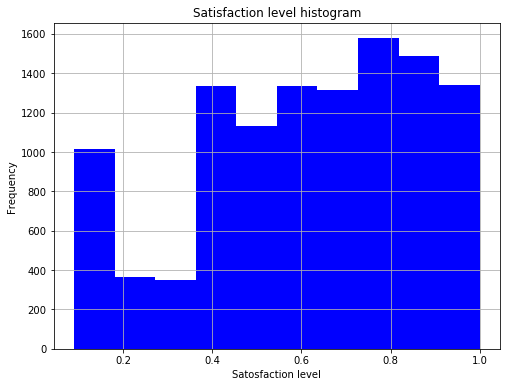

In [49]:
plt.title("Satisfaction level histogram") #In matplotlib you build the graph in steps
plt.xlabel("Satosfaction level")
plt.ylabel("Frequency")
df_train.satisfaction_level.hist(figsize=(8,6), bins = 10, color = "blue")

#### 4) Several histograms on one page

Below are 4 histograms on a page, arranged with the par function. Draw a set of 6 histograms from the HR data.

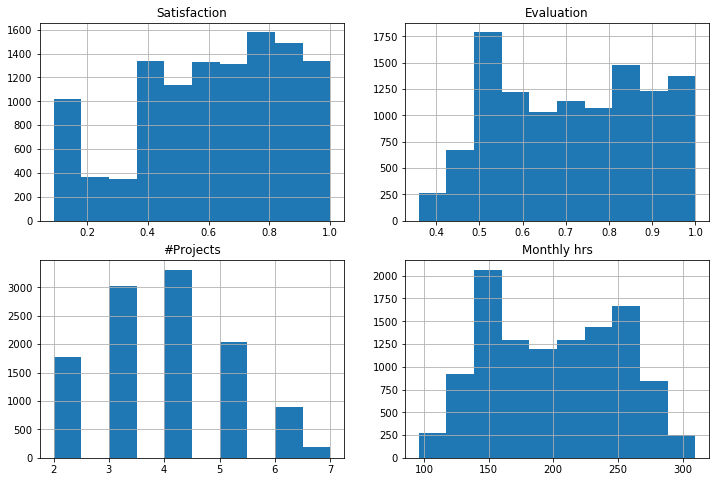

In [64]:
plt.figure(1, figsize=(12,8)) #group the below under one figure, and set the figure size
plt.subplot(221)
plt.title("Satisfaction")
df_train.satisfaction_level.hist(bins = 10)
plt.subplot(222) 
plt.title("Evaluation")
df_train.last_evaluation.hist(bins = 10)
plt.subplot(223)
plt.title("#Projects")
df_train.number_project.hist(bins = 10)
plt.subplot(224) 
plt.title("Monthly hrs")
df_train.average_montly_hours.hist(bins = 10)


#### 5) Several histograms on the same plot

Histogram’s can be in the same plot, and may overlap one on top of another. Therefore, when drawing two histograms on the same graph, use transparent colors.



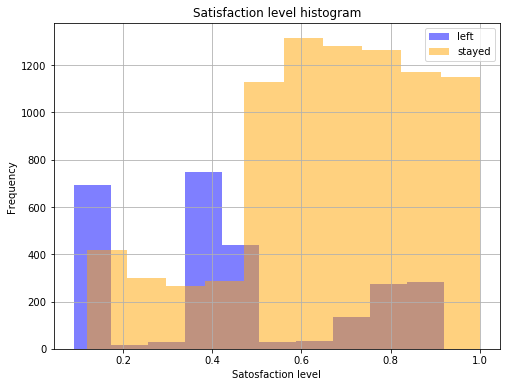

In [87]:

plt.title("Satisfaction level histogram") #In matplotlib you build the graph in steps
plt.xlabel("Satosfaction level")
plt.ylabel("Frequency")
df_train.satisfaction_level[df_train.left==1].hist(figsize=(8,6), bins = 10, color = "blue", alpha=0.5, label="left")
df_train.satisfaction_level[df_train.left==0].hist(figsize=(8,6), bins = 10, color = "orange", alpha=0.5, label = "stayed")
plt.legend()

You can plot several graphs, each with overlapping histograms, as below.

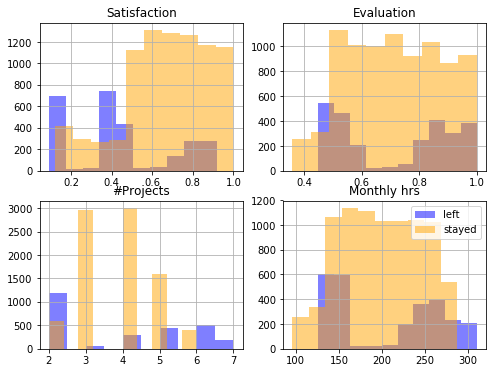

In [94]:
plt.figure(1, figsize=(12,8)) #group the below under one figure, and set the figure size
plt.subplot(221)
plt.title("Satisfaction")
df_train.satisfaction_level[df_train.left==1].hist(figsize=(8,6), bins = 10, color = "blue", alpha=0.5, label="left")
df_train.satisfaction_level[df_train.left==0].hist(figsize=(8,6), bins = 10, color = "orange", alpha=0.5, label = "stayed")
plt.subplot(222) 
plt.title("Evaluation")
df_train.last_evaluation[df_train.left==1].hist(figsize=(8,6), bins = 10, color = "blue", alpha=0.5, label="left")
df_train.last_evaluation[df_train.left==0].hist(figsize=(8,6), bins = 10, color = "orange", alpha=0.5, label = "stayed")
plt.subplot(223)
plt.title("#Projects")
df_train.number_project[df_train.left==1].hist(figsize=(8,6), bins = 10, color = "blue", alpha=0.5, label="left")
df_train.number_project[df_train.left==0].hist(figsize=(8,6), bins = 10, color = "orange", alpha=0.5, label = "stayed")
plt.subplot(224) 
plt.title("Monthly hrs")
df_train.average_montly_hours[df_train.left==1].hist(figsize=(8,6), bins = 10, color = "blue", alpha=0.5, label="left")
df_train.average_montly_hours[df_train.left==0].hist(figsize=(8,6), bins = 10, color = "orange", alpha=0.5, label = "stayed")
plt.legend()

What can you suspect about those who leave the company from the graphs above?

#### 6) Histogram and bar

1. Your target is to predict attrition of high achivers.
    * How will you define a high achiver?
    * Filter the graphs page above to high achivers.
2. Run the hist function on sales (role)
    * What is the result?
    * Why?
3. To draw a bar chart you can use the function barplot
    * Draw a barplot of number of employees per role
    * Edit the colors, title and axis titles
    * In the hist the bars are adjacent, whereas in plot there are spaces between bars. Explain, why?
4. Draw a bar plot that will show attrition and no-attrition, per role

## Finding connections between variables
### Correlation plots
Correlations between variables can be investigated with a scatter plot(s).

#### 7) Scatter plot

Below is a scatter plot of last evaluation per the satisfaction level, and those who left the company are marked in red. 
1. Describe a rule: Which employees are likely to leave the company. 
2. If you know the employee’s last evaluation what can you tell on his satisfaction level. 
3. The scatterplot below includes 15000 points and therefore many points are hiding others. Draw the same scatterplot for a random sample of 200 points. 
4. Draw a scatterplot of 200 points to investigate if there is a connection between number of projects and the average monthly hours. 
5. Test your conclusion from the question above on a diffrent sample of 200 points.

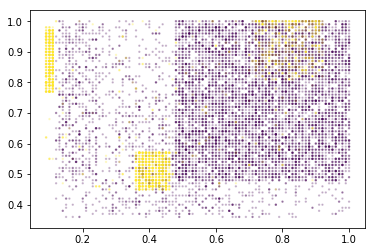

In [137]:
plt.scatter(df_train.satisfaction_level, df_train.last_evaluation, s=2, c=df_train.left, alpha = 0.2)

#### 8) Pairs - table of correlation graphs

To draw a matrix of connections in a set of numerical variables use the pairs function, but first narrow your data to small set of columns as the matrix may be too large. From the pairs below you can see that this data set variables are not correlated. Read more on subsets of a data frame in Python in: http://www.datacarpentry.org/python-ecology-lesson/02-index-slice-subset/ 

Below is a code to draw pairs for all train data. Draw the pairs for a sample of 200 points.

In [120]:
df_numerical = df_train [['satisfaction_level','last_evaluation','number_project', 'average_montly_hours','time_spend_company']]
df_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
2569,0.79,0.58,5,165,3
7565,0.95,0.77,3,184,4
14587,0.56,0.71,4,296,2
12379,0.77,0.93,4,231,5
13457,0.69,0.56,4,149,3
14750,0.11,0.94,7,244,4
10594,0.78,0.70,4,139,3
4229,0.74,0.94,3,132,3
6930,0.58,0.78,3,223,3
12012,0.84,0.92,4,234,5


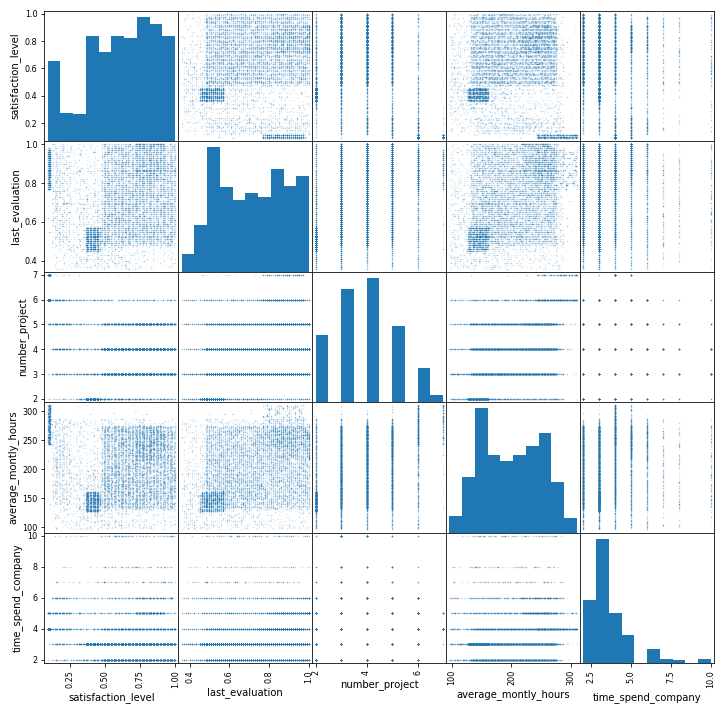

In [135]:
axes = pd.tools.plotting.scatter_matrix(df_numerical, s=0.5, alpha=0.2, figsize=(12,12))


#### 9) Correlation

To calculate correlations use the cor function. For example:

In [140]:
from scipy.stats.stats import pearsonr
pearsonr(df_train.number_project, df_train.average_montly_hours)

(0.41560377790280084, 0.0)

1. Calculate the correlation between all df_numerical variables, in one command. (You may first create a data frame with the numeric columns only.) You may search the web for correlation table.
2. Are there diffrences in correlations between the numeric varaiables for those who left the company vs. those who stayed?
3. For employees who left the company, which 2 predictors have a linear connection (regression)?